# Introduction

# Libraries and Data loading

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
df = pd.read_csv(r'D:\Data analyst\datasets_kaggle\bi.csv',encoding='latin1')

my_colors = ["#8dd1ef","#9f8def","#8defdd","#daef8d","#EF7F7F","#efc08d","#36f4cb"]
my_palette = sns.color_palette(my_colors)

# Data preview

**Columns and rows**

In [199]:
pd.set_option('display.float_format','{:.6f}'.format) #Codigo utilizado para definir 6 decimales por defecto
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.000000,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.000000,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.000000,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.000000,80


In [200]:
print(f"Total rows: {df.shape[0]} \nTotal columns: {df.shape[1]}")
print('-'*50)
print(df.info())

Total rows: 77 
Total columns: 11
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None


**Summary Statistics**

In [201]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


# Data cleaning

**Column names**

In [202]:
df.columns = df.columns.str.strip().str.lower().str.replace('name','_name')

In [203]:
df.columns

Index(['f_name', 'l_name', 'age', 'gender', 'country', 'residence',
       'entryexam', 'preveducation', 'studyhours', 'python', 'db'],
      dtype='object')

In [204]:
rename_cols = {
    'f_name':'first_name',
    'l_name':'last_name',
    'entryexam':'entry_exam',
    'preveducation':'previous_education',
    'studyhours':'study_hours'
}
df.rename(columns=rename_cols, inplace=True)
df.columns

Index(['first_name', 'last_name', 'age', 'gender', 'country', 'residence',
       'entry_exam', 'previous_education', 'study_hours', 'python', 'db'],
      dtype='object')

**Normalize gender**

In [205]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

The column gender has multiple notations for the same gender.

In [206]:
gender_map = {
    'F':'Female','female':'Female','Female':'Female',
    'M':'Male','male':'Male','Male':'Male'
}

df['gender'] = df['gender'].map(lambda x: gender_map.get(str(x).strip(),'Other'))

In [207]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

**Count gender values**

In [208]:
df['gender'].value_counts()

gender
Female    43
Male      34
Name: count, dtype: int64

**Normalize education**

In [209]:
df['previous_education'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

The column previous_education has multiple notations for the same value.

In [210]:
df['previous_education'] = (
    df['previous_education'].str.strip()
    .str.lower()
    .replace({'highschool':'high school'})
    .replace({'diplomaaa':'diploma'})
    .replace({'barrrchelors':'bachelors'})
    .str.title()
)
df['previous_education'].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

**Count previous_education values**

In [211]:
df['previous_education'].value_counts()

previous_education
Bachelors      25
High School    19
Masters        16
Diploma        12
Doctorate       5
Name: count, dtype: int64

**Normalize country**

In [212]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

The project description indicates inconsistencies with country names. Norge --> Norway, RSA --> South Africa, UK --> United Kingdom

In [213]:
df['country'] = (
    df['country'].str.strip()
    .str.lower()
    .replace({'norge':'norway'})
    .replace({'rsa':'south africa'})
    .replace({'somali':'somalia'})
    .str.title()
    .replace({'Uk':'UK'})
)

In [214]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'UK', 'Somalia', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [215]:
df['country'].value_counts()

country
Norway          49
Uganda           4
Kenya            3
Germany          3
South Africa     2
Denmark          2
Netherlands      2
Spain            2
Italy            2
UK               2
Somalia          2
Nigeria          2
France           2
Name: count, dtype: int64

**Normalize residence**

In [216]:
df['residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

The column has multiple notations for BI-residence

In [217]:
df['residence'] = (
    df['residence'].str.strip()
    .replace({'BI-Residence':'BI Residence'})
    .replace({'BIResidence':'BI Residence'})
    .replace({'BI_Residence':'BI Residence'})
)

In [218]:
df['residence'].value_counts()

residence
Private         33
BI Residence    32
Sognsvann       12
Name: count, dtype: int64

Handling NaN values

In [219]:
df.isna().sum()

first_name            0
last_name             0
age                   0
gender                0
country               0
residence             0
entry_exam            0
previous_education    0
study_hours           0
python                2
db                    0
dtype: int64

**Comment** 

Only the python column has null values. 

Let's dive in nans.

In [220]:
df['python'].sort_values().unique()

array([15., 30., 31., 33., 45., 48., 57., 59., 60., 61., 63., 66., 69.,
       70., 72., 74., 75., 76., 78., 79., 80., 81., 82., 83., 84., 85.,
       86., 87., 88., 90., 91., nan])

In [221]:
bool_mask_nan = df.isna()
filas_nan = df[bool_mask_nan.any(axis=1)]
filas_nan

,first_name,last_name,age,gender,country,residence,entry_exam,previous_education,study_hours,python,db
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
33,Frank,Abrahamsen,23,Male,Norway,BI Residence,68,High School,152,NaN,70


In [222]:
previous = df[df['previous_education']=='High School']
previous.head()

,first_name,last_name,age,gender,country,residence,entry_exam,previous_education,study_hours,python,db
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.000000,50
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.000000,80
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.000000,59
20,Prof,Birkeland,22,Male,Norway,BI Residence,45,High School,116,33.000000,30


**Comment**

There is not a pattern in NaN values, we will assign the median value.

In [223]:
df['python'] = df['python'].fillna(df['python'].median())

Numeric coercion

In [224]:
numeric_expect = ['age','entry_exam','study_hours','python','db']
for col in numeric_expect:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_name          77 non-null     object 
 1   last_name           77 non-null     object 
 2   age                 77 non-null     int64  
 3   gender              77 non-null     object 
 4   country             77 non-null     object 
 5   residence           77 non-null     object 
 6   entry_exam          77 non-null     int64  
 7   previous_education  77 non-null     object 
 8   study_hours         77 non-null     int64  
 9   python              77 non-null     float64
 10  db                  77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


# Data Visualization

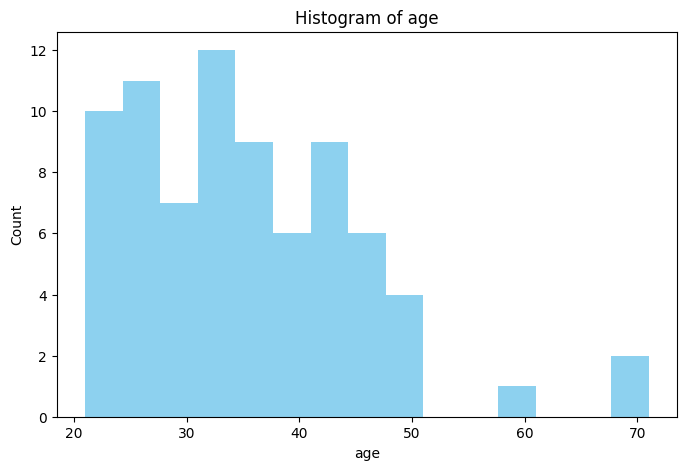

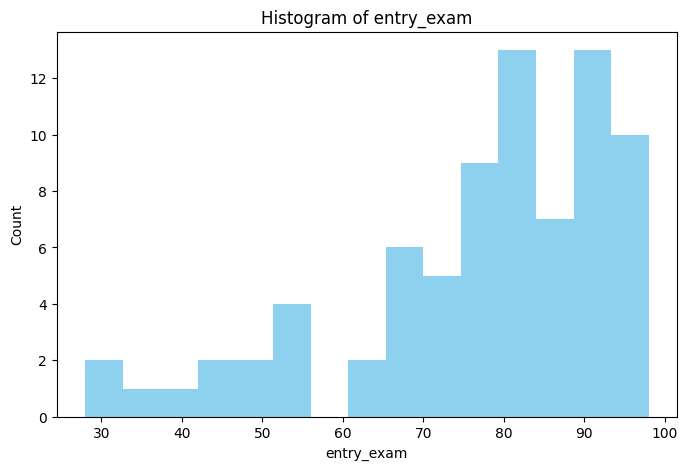

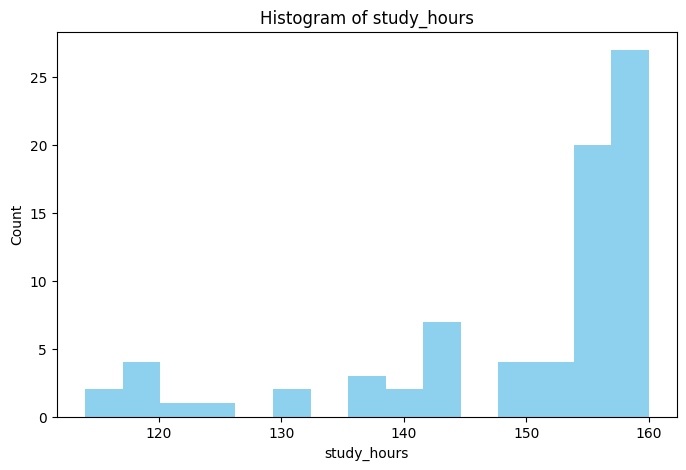

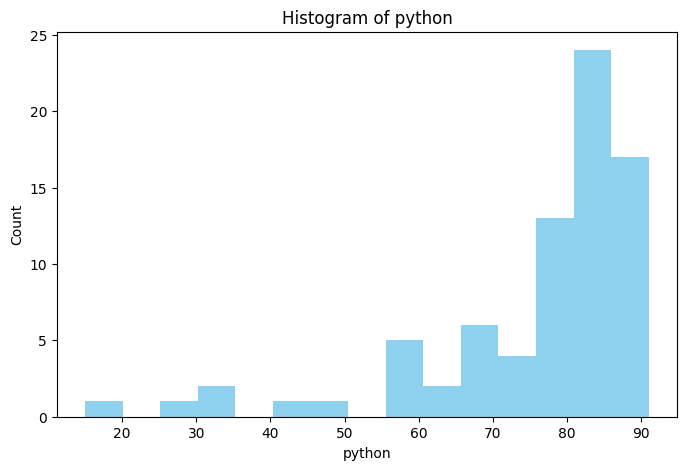

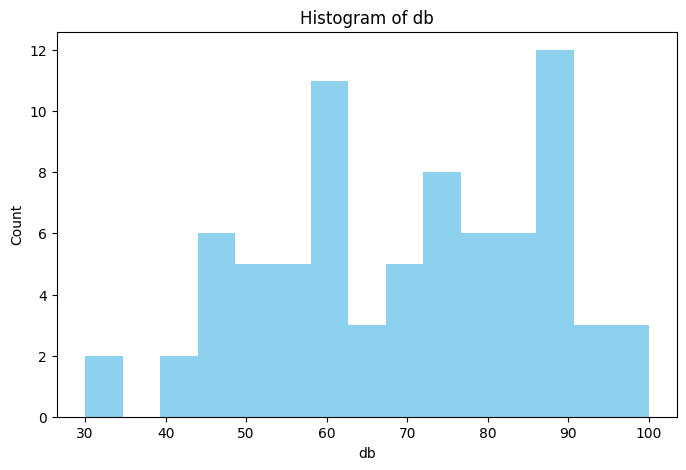

In [226]:
numeric_cols = list(df.select_dtypes(include=[np.number]).columns)

for col in numeric_cols:
    fig = plt.figure(figsize=(8,5))
    plt.hist(df[col].dropna(), bins=15, color=my_palette[0])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col); plt.ylabel('Count')
    plt.show()

In [227]:
categorical_cols = ['gender','country','residence','previous_education']

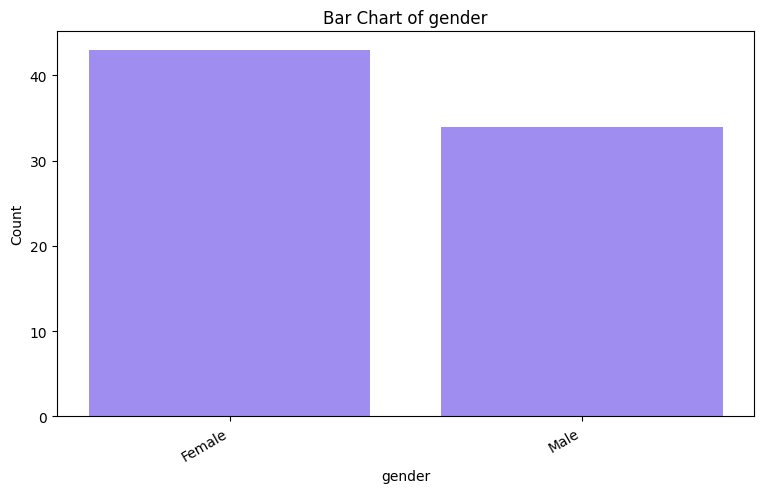

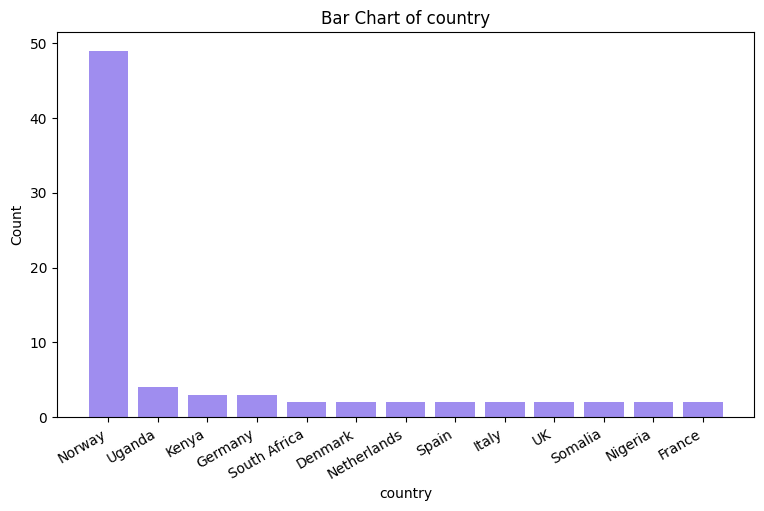

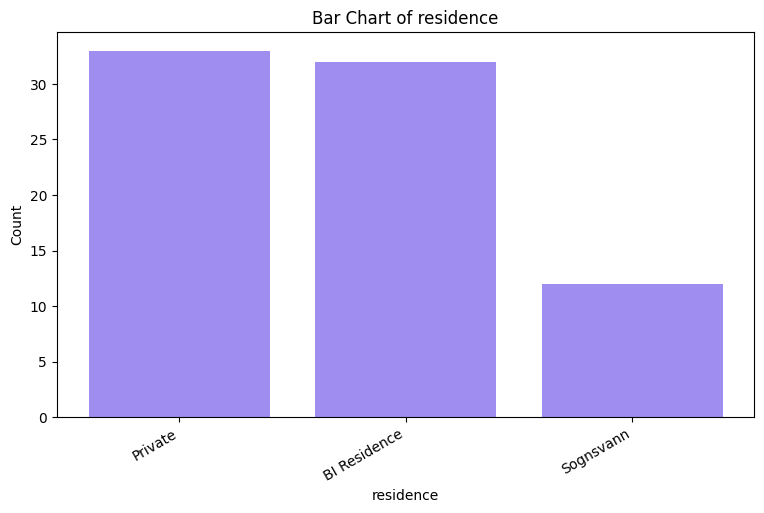

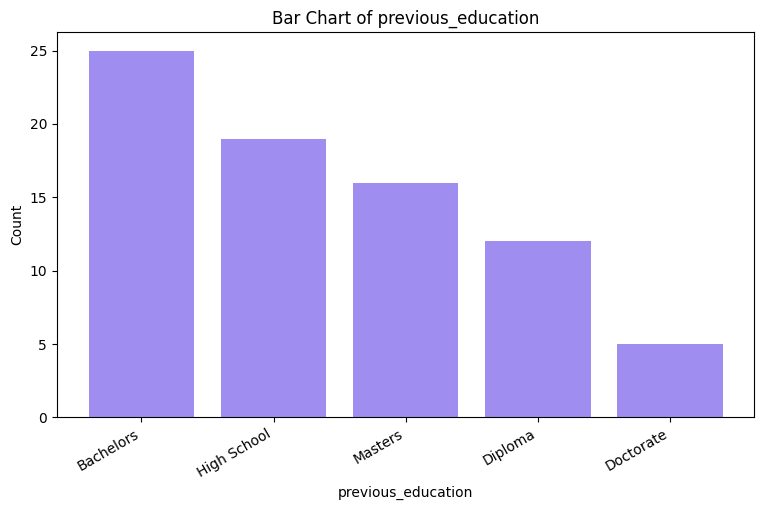

In [228]:
for col in categorical_cols:
    counts = df[col].value_counts()
    fig = plt.figure(figsize=(9,5))
    plt.bar(counts.index.astype(str), counts.values, color=my_palette[1])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col), plt.ylabel('Count')
    plt.xticks(rotation=30, ha='right')
    plt.show()